## NOTE  
#### Original files for the project exceed GitHub's maximum file size limit. Click on the link below to access complete code and data files for the
#### project.

LINK: https://drive.google.com/open?id=1gEbe5F8N_S7Adk-vE3nAFDGBuGDukw8i

## Initial Setup

In [1]:
from imports import *

Using TensorFlow backend.


In [2]:
#Import sc class which contains all the functions for operating the stackClassifier
from stackClassifier import sc

## Python Stack Overflow Questions Tags being Classified

#### 1: pandas
#### 2: list
#### 3: numpy
#### 4: matplotlib
#### 5: regex
#### 6: dictionary
#### 7: string
#### 8: mysql
#### 9: json
#### 10: csv
#### 11: beautifulsoup


## Initialize Stack Classifier

In [3]:
# We have already preprocessed the dataframe and saved it as a pickle file called 'processed_df' for faster execution
# If the preprocessed dataframe doesnot exist set load = False inorder to create a new one
stack_classifier = sc(load = True)

#### Total number of observations

In [4]:
len(stack_classifier.df)

112661

#### Visualizing distribution of Tags in the dataset

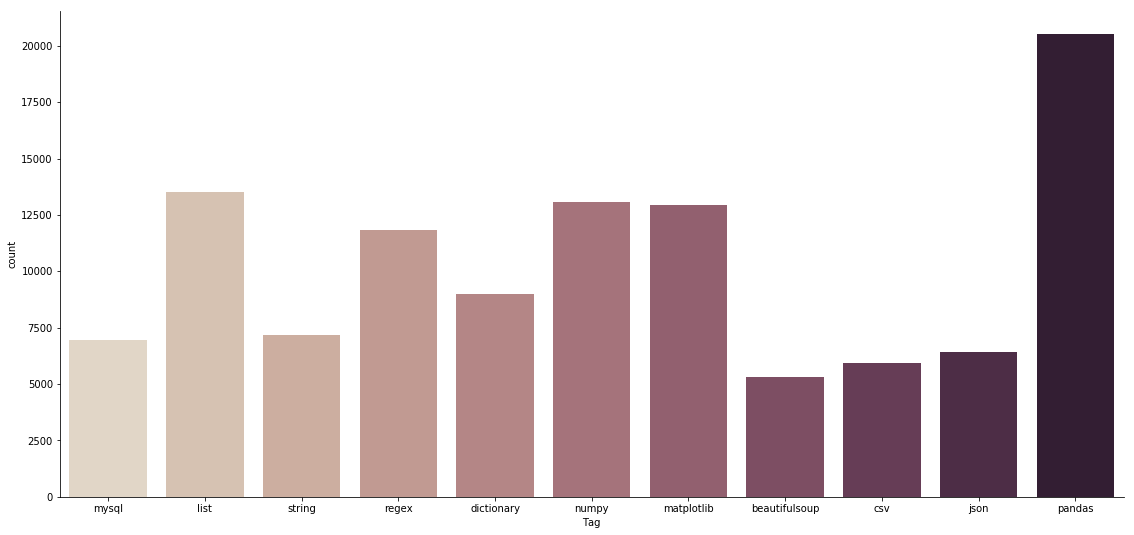

In [5]:
ax = sns.catplot(x='Tag', kind="count", palette="ch:.25", data=stack_classifier.df)
ax.fig.set_size_inches(18,8)

## Load Model

The best performing neural network with 512 nodes in first hidden layer and 64 nodes in the second hidden layer has already been created and saved as 'tag_classifier.h5' to save executation time. You can train a new neural network by calling the 'train_neural_network' function.

In [5]:
model = stack_classifier.load_neural_network('tag_classifier')

W0917 16:23:20.661309 4429637056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 16:23:20.674825 4429637056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0917 16:23:20.684943 4429637056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 16:23:20.685856 4429637056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0917 16:23:20.692325 4429637056 deprecatio

## Evaluate Model

In [7]:
#Get confusion matrix, classification report and accuracy score
cm, c_report, a_report = stack_classifier.evaluate_model_df(model, c_matrix = True, c_report= True, a_score= True, load = True)

#### Classficiation Report

In [8]:
print(c_report)

               precision    recall  f1-score   support

beautifulsoup       0.91      0.94      0.92      1750
          csv       0.87      0.86      0.86      1946
   dictionary       0.88      0.83      0.85      3008
         json       0.89      0.91      0.90      2109
         list       0.82      0.84      0.83      4457
   matplotlib       0.94      0.95      0.94      4244
        mysql       0.91      0.93      0.92      2288
        numpy       0.89      0.90      0.90      4344
       pandas       0.94      0.94      0.94      6722
        regex       0.89      0.89      0.89      3910
       string       0.73      0.69      0.71      2401

    micro avg       0.89      0.89      0.89     37179
    macro avg       0.88      0.88      0.88     37179
 weighted avg       0.89      0.89      0.89     37179



#### Accuracy Score

In [9]:
print(f'The Accuracy Score is: {a_report}')

The Accuracy Score is: 0.8868985179805804


#### Confusion Matrix

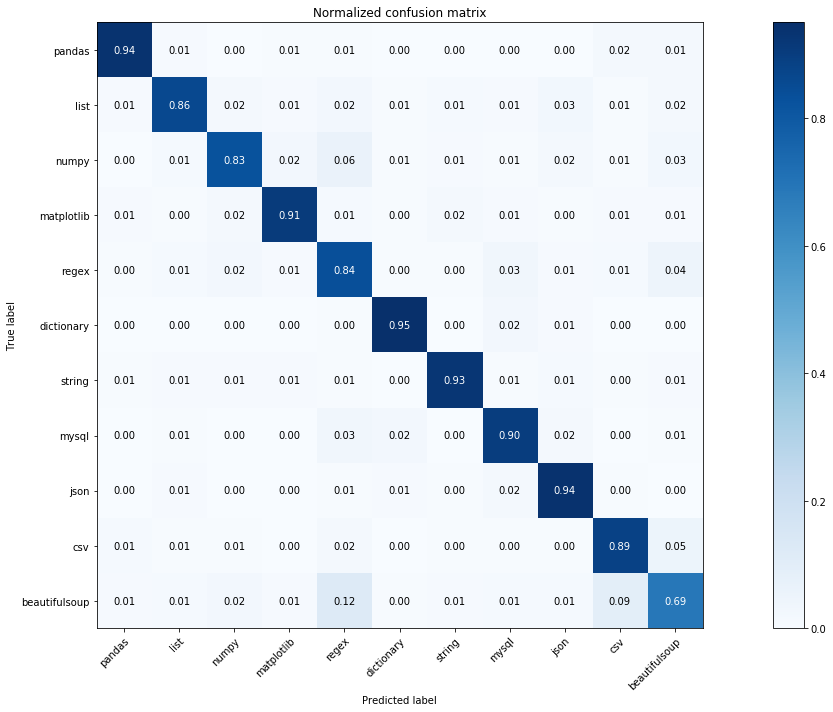

In [10]:
classes = list(stack_classifier.df.Tag.value_counts().to_dict().keys())

title = 'Normalized confusion matrix'

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize = (20,10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
   yticks=np.arange(cm.shape[0]),
   # ... and label them with the respective list entries
   xticklabels=classes, yticklabels=classes,
   title=title,
   ylabel='True label',
   xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
     rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()